### Ames 2: The Revisting

In [1]:
%ls

Ames-EDA.ipynb                    submission.csv
EDA-function .ipynb               submission2.csv
Housing_mob (1).ipynb             submission3.csv
Untitled Folder/                  submission4.csv
ames-attempts-4-5.ipynb           test.csv*
attempt-#2.ipynb                  test_clean.csv
project_2_aims- attempt-#1.ipynb  train.csv*
sample_sub_reg.csv*               train_clean.csv


Imports

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

Load the data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

EDA

In [4]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
#good columns that we care about
good_cols = ['SalePrice', 'Overall Qual', 'Full Bath', 'Garage Area', 'Lot Area', 'Enclosed Porch', 'Kitchen AbvGr']

In [6]:
train[good_cols].head()

,SalePrice,Overall Qual,Full Bath,Garage Area,Lot Area,Enclosed Porch,Kitchen AbvGr
0,130500,6,2,475.0,13517,0,1
1,220000,7,2,559.0,11492,0,1
2,109000,5,1,246.0,7922,0,1
3,174000,5,2,400.0,9802,0,1
4,138500,6,2,484.0,14235,0,1


In [7]:
train[good_cols].isnull().sum()

SalePrice         0
Overall Qual      0
Full Bath         0
Garage Area       1
Lot Area          0
Enclosed Porch    0
Kitchen AbvGr     0
dtype: int64

In [8]:
train.dropna(subset=['Garage Area'], inplace=True)

In [9]:
train[good_cols].isnull().sum()

SalePrice         0
Overall Qual      0
Full Bath         0
Garage Area       0
Lot Area          0
Enclosed Porch    0
Kitchen AbvGr     0
dtype: int64

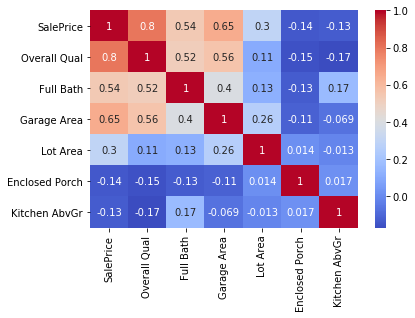

In [10]:
#check correlations
sns.heatmap(train[good_cols].corr(), annot=True, cmap='coolwarm')

In [11]:
good_cols

['SalePrice',
 'Overall Qual',
 'Full Bath',
 'Garage Area',
 'Lot Area',
 'Enclosed Porch',
 'Kitchen AbvGr']

In [12]:
#create features list using list comprehension 

features = [col for col in good_cols if col != 'SalePrice']

In [13]:
# set feature matrix and target
X = train[features]
y = train['SalePrice']

In [14]:
### polynomial features
# instantiate
poly = PolynomialFeatures(include_bias=False)

# fit transform
X_poly = poly.fit_transform(X)

# save the feature names
poly_feat = poly.get_feature_names(features)


In [15]:
poly_feat

['Overall Qual',
 'Full Bath',
 'Garage Area',
 'Lot Area',
 'Enclosed Porch',
 'Kitchen AbvGr',
 'Overall Qual^2',
 'Overall Qual Full Bath',
 'Overall Qual Garage Area',
 'Overall Qual Lot Area',
 'Overall Qual Enclosed Porch',
 'Overall Qual Kitchen AbvGr',
 'Full Bath^2',
 'Full Bath Garage Area',
 'Full Bath Lot Area',
 'Full Bath Enclosed Porch',
 'Full Bath Kitchen AbvGr',
 'Garage Area^2',
 'Garage Area Lot Area',
 'Garage Area Enclosed Porch',
 'Garage Area Kitchen AbvGr',
 'Lot Area^2',
 'Lot Area Enclosed Porch',
 'Lot Area Kitchen AbvGr',
 'Enclosed Porch^2',
 'Enclosed Porch Kitchen AbvGr',
 'Kitchen AbvGr^2']

In [16]:
poly_df = pd.DataFrame(X_poly, columns=poly_feat)
poly_df.head()

,Overall Qual,Full Bath,Garage Area,Lot Area,Enclosed Porch,Kitchen AbvGr,Overall Qual^2,Overall Qual Full Bath,Overall Qual Garage Area,Overall Qual Lot Area,...,Garage Area^2,Garage Area Lot Area,Garage Area Enclosed Porch,Garage Area Kitchen AbvGr,Lot Area^2,Lot Area Enclosed Porch,Lot Area Kitchen AbvGr,Enclosed Porch^2,Enclosed Porch Kitchen AbvGr,Kitchen AbvGr^2
0,6.0,2.0,475.0,13517.0,0.0,1.0,36.0,12.0,2850.0,81102.0,...,225625.0,6420575.0,0.0,475.0,182709289.0,0.0,13517.0,0.0,0.0,1.0
1,7.0,2.0,559.0,11492.0,0.0,1.0,49.0,14.0,3913.0,80444.0,...,312481.0,6424028.0,0.0,559.0,132066064.0,0.0,11492.0,0.0,0.0,1.0
2,5.0,1.0,246.0,7922.0,0.0,1.0,25.0,5.0,1230.0,39610.0,...,60516.0,1948812.0,0.0,246.0,62758084.0,0.0,7922.0,0.0,0.0,1.0
3,5.0,2.0,400.0,9802.0,0.0,1.0,25.0,10.0,2000.0,49010.0,...,160000.0,3920800.0,0.0,400.0,96079204.0,0.0,9802.0,0.0,0.0,1.0
4,6.0,2.0,484.0,14235.0,0.0,1.0,36.0,12.0,2904.0,85410.0,...,234256.0,6889740.0,0.0,484.0,202635225.0,0.0,14235.0,0.0,0.0,1.0


In [17]:
### join the sale price
poly_df = poly_df.join(train['SalePrice'])

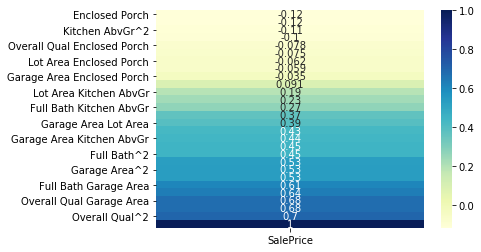

In [18]:
### look at new correlations

sns.heatmap(poly_df.corr()[['SalePrice']].sort_values('SalePrice'), annot=True, cmap='YlGnBu')

In [19]:
poly_df.isnull().sum().sort_values(ascending=False)

SalePrice                       1
Kitchen AbvGr^2                 0
Full Bath                       0
Garage Area                     0
Lot Area                        0
Enclosed Porch                  0
Kitchen AbvGr                   0
Overall Qual^2                  0
Overall Qual Full Bath          0
Overall Qual Garage Area        0
Overall Qual Lot Area           0
Overall Qual Enclosed Porch     0
Overall Qual Kitchen AbvGr      0
Full Bath^2                     0
Full Bath Garage Area           0
Full Bath Lot Area              0
Full Bath Enclosed Porch        0
Full Bath Kitchen AbvGr         0
Garage Area^2                   0
Garage Area Lot Area            0
Garage Area Enclosed Porch      0
Garage Area Kitchen AbvGr       0
Lot Area^2                      0
Lot Area Enclosed Porch         0
Lot Area Kitchen AbvGr          0
Enclosed Porch^2                0
Enclosed Porch Kitchen AbvGr    0
Overall Qual                    0
dtype: int64

In [20]:
poly_df[poly_feat].head()

,Overall Qual,Full Bath,Garage Area,Lot Area,Enclosed Porch,Kitchen AbvGr,Overall Qual^2,Overall Qual Full Bath,Overall Qual Garage Area,Overall Qual Lot Area,...,Garage Area^2,Garage Area Lot Area,Garage Area Enclosed Porch,Garage Area Kitchen AbvGr,Lot Area^2,Lot Area Enclosed Porch,Lot Area Kitchen AbvGr,Enclosed Porch^2,Enclosed Porch Kitchen AbvGr,Kitchen AbvGr^2
0,6.0,2.0,475.0,13517.0,0.0,1.0,36.0,12.0,2850.0,81102.0,...,225625.0,6420575.0,0.0,475.0,182709289.0,0.0,13517.0,0.0,0.0,1.0
1,7.0,2.0,559.0,11492.0,0.0,1.0,49.0,14.0,3913.0,80444.0,...,312481.0,6424028.0,0.0,559.0,132066064.0,0.0,11492.0,0.0,0.0,1.0
2,5.0,1.0,246.0,7922.0,0.0,1.0,25.0,5.0,1230.0,39610.0,...,60516.0,1948812.0,0.0,246.0,62758084.0,0.0,7922.0,0.0,0.0,1.0
3,5.0,2.0,400.0,9802.0,0.0,1.0,25.0,10.0,2000.0,49010.0,...,160000.0,3920800.0,0.0,400.0,96079204.0,0.0,9802.0,0.0,0.0,1.0
4,6.0,2.0,484.0,14235.0,0.0,1.0,36.0,12.0,2904.0,85410.0,...,234256.0,6889740.0,0.0,484.0,202635225.0,0.0,14235.0,0.0,0.0,1.0


In [21]:
#train, test, split
X_train, X_holdout, y_train, y_holdout = train_test_split(
            poly_df[poly_feat], 
            y, 
            random_state=23)

In [22]:
#instantiate 
lr = LinearRegression()

In [23]:
#fit model on training data only
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Model Evaluation

In [24]:
#score model 
lr.score(X_train, y_train)

0.7953143108671988

In [25]:
#test score
lr.score(X_holdout, y_holdout)

0.8141921863235888

Cross Validate

In [26]:
cross_val_score(lr, X_train, y_train, cv=6).mean()

#With this much range, we want to start digging in more to reduce variance

0.7586135269795662

In [27]:
cross_val_score(lr, X_holdout, y_holdout, cv=5).mean()

0.8272517584778448

In [28]:
#We can conclude that we have bias here because our scores are staying the same 
#but our r2 is still off by quite a bit.
#Probably need more predictors/features

Predict

In [29]:
#check test features for nulls
test[features].isnull().sum()

Overall Qual      0
Full Bath         0
Garage Area       0
Lot Area          0
Enclosed Porch    0
Kitchen AbvGr     0
dtype: int64

In [30]:
## transform for test 
X_test_poly = poly.transform(test[features])
X_test = pd.DataFrame(X_test_poly, columns=poly_feat)
X_test.head()

,Overall Qual,Full Bath,Garage Area,Lot Area,Enclosed Porch,Kitchen AbvGr,Overall Qual^2,Overall Qual Full Bath,Overall Qual Garage Area,Overall Qual Lot Area,...,Garage Area^2,Garage Area Lot Area,Garage Area Enclosed Porch,Garage Area Kitchen AbvGr,Lot Area^2,Lot Area Enclosed Porch,Lot Area Kitchen AbvGr,Enclosed Porch^2,Enclosed Porch Kitchen AbvGr,Kitchen AbvGr^2
0,6.0,2.0,440.0,9142.0,112.0,2.0,36.0,12.0,2640.0,54852.0,...,193600.0,4022480.0,49280.0,880.0,83576164.0,1023904.0,18284.0,12544.0,224.0,4.0
1,5.0,2.0,580.0,9662.0,0.0,2.0,25.0,10.0,2900.0,48310.0,...,336400.0,5603960.0,0.0,1160.0,93354244.0,0.0,19324.0,0.0,0.0,4.0
2,7.0,2.0,426.0,17104.0,0.0,1.0,49.0,14.0,2982.0,119728.0,...,181476.0,7286304.0,0.0,426.0,292546816.0,0.0,17104.0,0.0,0.0,1.0
3,5.0,1.0,480.0,8520.0,184.0,1.0,25.0,5.0,2400.0,42600.0,...,230400.0,4089600.0,88320.0,480.0,72590400.0,1567680.0,8520.0,33856.0,184.0,1.0
4,6.0,1.0,514.0,9500.0,0.0,1.0,36.0,6.0,3084.0,57000.0,...,264196.0,4883000.0,0.0,514.0,90250000.0,0.0,9500.0,0.0,0.0,1.0


In [31]:
#generate y_hat
y_hat = lr.predict(X_test)

In [32]:
y_hat[:5]
# a list of our predicted sales prices

array([152597.20946316, 129432.57710191, 232445.72967099, 124026.58321474,
       160075.00215075])

In [33]:
submission_df = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': y_hat  #passing in all our predictions 
})
submission_df.head()

,Id,SalePrice
0,2658,152597.209463
1,2718,129432.577102
2,2414,232445.729671
3,1989,124026.583215
4,625,160075.002151


In [34]:
#create csv / format for Kaggle
submission_df.to_csv('submission3.csv', index=False)